   distance  accuracy
0  0.314379 -0.707727
1  1.693777 -1.586669
2 -0.059695 -0.176699
3 -0.574047  0.372640
4  1.343083 -1.934584


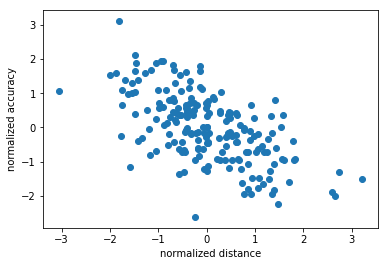

In [1]:
import pandas
import matplotlib.pyplot as plt

# Read data from csv
pga = pandas.read_csv("pga.csv")


# Normalize the data
pga.distance = (pga.distance - pga.distance.mean()) / pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean()) / pga.accuracy.std()
print(pga.head())

plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')
plt.show()

In [2]:
# accuracyi=θ1distancei+θ0+ϵ

from sklearn.linear_model import LinearRegression
import numpy as np

# We can add a dimension to an array by using np.newaxis
print("Shape of the series:", pga.distance.shape)
print("Shape with newaxis:", pga.distance[:, np.newaxis].shape)

# The X variable in LinearRegression.fit() must have 2 dimensions
lm = LinearRegression()
lm.fit(pga.distance[:, np.newaxis], pga.accuracy)
theta1 = lm.coef_[0]
print (theta1)

Shape of the series: (197,)
Shape with newaxis: (197, 1)
-0.6075988227151216


1.599438422599817


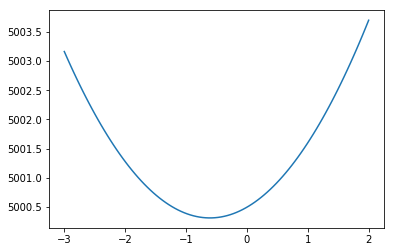

In [11]:
# The cost function of a single variable linear model
def cost(theta0, theta1, x, y):
    # Initialize cost
    J = 0
    # The number of observations
    m = len(x)
    # Loop through each observation
    for i in range(m):
        # Compute the hypothesis 
        h = theta1 * x[i] + theta0
        # Add to cost
        J += (h - y[i])**2
    # Average and normalize cost
    J /= (2*m)
    return J

# The cost for theta0=0 and theta1=1
print(cost(0, 1, pga.distance, pga.accuracy))

theta0 = 100
theta1s = np.linspace(-3,2,100)
costs = []
for theta1 in theta1s:
    costs.append(cost(theta0, theta1, pga.distance, pga.accuracy))

plt.plot(theta1s, costs)
plt.show()

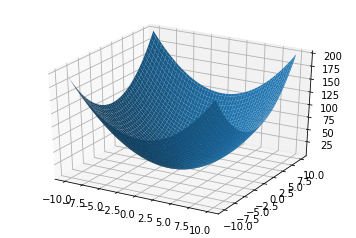

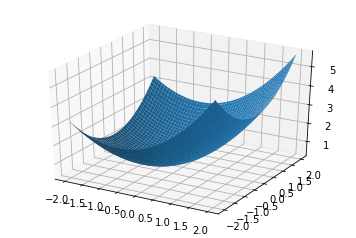

In [12]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Example of a Surface Plot using Matplotlib
# Create x an y variables
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

# We must create variables to represent each possible pair of points in x and y
# ie. (-10, 10), (-10, -9.8), ... (0, 0), ... ,(10, 9.8), (10,9.8)
# x and y need to be transformed to 100x100 matrices to represent these coordinates
# np.meshgrid will build a coordinate matrices of x and y
X, Y = np.meshgrid(x,y)
#print(X[:5,:5],"\n",Y[:5,:5])

# Compute a 3D parabola 
Z = X**2 + Y**2 

# Open a figure to place the plot on
fig = plt.figure()
# Initialize 3D plot
ax = fig.gca(projection='3d')
# Plot the surface
ax.plot_surface(X=X,Y=Y,Z=Z)

plt.show()

# Use these for your excerise 
theta0s = np.linspace(-2,2,100)
theta1s = np.linspace(-2,2, 100)
COST = np.empty(shape=[100,100])
# Meshgrid for paramaters 
T0S, T1S = np.meshgrid(theta0s, theta1s)
# for each parameter combination compute the cost
for i in range(100):
    for j in range(100):
        COST[i,j] = cost(T0S[0,i], T1S[j,0], pga.distance, pga.accuracy)

# make 3d plot
fig2 = plt.figure()
ax = fig2.gca(projection='3d')
ax.plot_surface(X=T0S,Y=T1S,Z=COST)
plt.show()

In [17]:
def partial_cost_theta1(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    # Hypothesis minus observed times x
    diff = (h - y) * x
    # Average to compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial

partial1 = partial_cost_theta1(0, 5, pga.distance, pga.accuracy)
print("partial1 =", partial1)
# Partial derivative of cost in terms of theta0
def partial_cost_theta0(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    # Difference between hypothesis and observation
    diff = (h - y)
    # Compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial

partial0 = partial_cost_theta0(1, 1, pga.distance, pga.accuracy)

partial1 = 5.5791338540718955


Theta1 = -0.6046983166379609


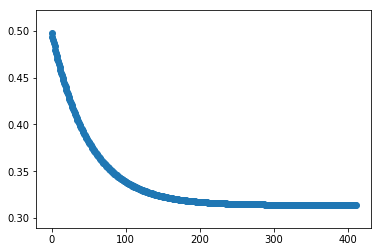

In [16]:
# x is our feature vector -- distance
# y is our target variable -- accuracy
# alpha is the learning rate
# theta0 is the intial theta0 
# theta1 is the intial theta1
def gradient_descent(x, y, alpha=0.1, theta0=0, theta1=0):
    max_epochs = 1000 # Maximum number of iterations
    counter = 0      # Intialize a counter
    c = cost(theta1, theta0, pga.distance, pga.accuracy)  ## Initial cost
    costs = [c]     # Lets store each update
    # Set a convergence threshold to find where the cost function in minimized
    # When the difference between the previous cost and current cost 
    #        is less than this value we will say the parameters converged
    convergence_thres = 0.000001  
    cprev = c + 10   
    theta0s = [theta0]
    theta1s = [theta1]

    # When the costs converge or we hit a large number of iterations will we stop updating
    while (np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):
        cprev = c
        # Alpha times the partial deriviative is our updated
        update0 = alpha * partial_cost_theta0(theta0, theta1, x, y)
        update1 = alpha * partial_cost_theta1(theta0, theta1, x, y)

        # Update theta0 and theta1 at the same time
        # We want to compute the slopes at the same set of hypothesised parameters
        #             so we update after finding the partial derivatives
        theta0 -= update0
        theta1 -= update1
        
        # Store thetas
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        # Compute the new cost
        c = cost(theta0, theta1, pga.distance, pga.accuracy)

        # Store updates
        costs.append(c)
        counter += 1   # Count

    return {'theta0': theta0, 'theta1': theta1, "costs": costs}

print("Theta1 =", gradient_descent(pga.distance, pga.accuracy)['theta1'])
descend = gradient_descent(pga.distance, pga.accuracy, alpha=.01)
plt.scatter(range(len(descend["costs"])), descend["costs"])
plt.show()